In [1]:
# import những thư viện cần thiết

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # line, bar, scatter, histogram, ...
import seaborn as sns #boxplot, heatmap, ...

# display setup cho đẹp và dễ nhìn
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: f'{x:.3f}')
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('pastel')

In [2]:
# import dữ liệu
df = pd.read_csv('/workspaces/adorie-data-projects/customer-personality-analysis/data/raw/marketing_campaign.csv',
                delimiter = "\t")

# ban đầu để delimiter default, 
# khi print df ra thì phát hiện dữ liệu không được phân tách bởi dấu cách (csv) 
# mà được phân tách bởi kí hiệu \t (tsv)
# --> bổ sung thêm delimiter vào read_csv

In [3]:
# xem một số thông tin cơ bản của dataframe
# số dòng, số cột
df.shape

(2240, 29)

In [4]:
# kiểu dữ liệu
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [5]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.000,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.000,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.000,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.000,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.000,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [6]:
# Có thể chia các cột / attributes theo nhóm:

# Nhóm về khách hàng:
# ID: Customer's unique identifier
# Year_Birth: Customer's birth year
# Education: Customer's education level -- CATEGORICAL
# Marital_Status: Customer's marital status -- CATEGORICAL
# Income: Customer's yearly household income
# Kidhome: Number of children in customer's household
# Teenhome: Number of teenagers in customer's household
# Dt_Customer: Date of customer's enrollment with the company
# Recency: Number of days since customer's last purchase
# Complain: 1 if the customer complained in the last 2 years, 0 otherwise -- BOOLEAN

# Nhóm về sản phẩm:
# MntWines: Amount spent on wine in last 2 years
# MntFruits: Amount spent on fruits in last 2 years
# MntMeatProducts: Amount spent on meat in last 2 years
# MntFishProducts: Amount spent on fish in last 2 years
# MntSweetProducts: Amount spent on sweets in last 2 years
# MntGoldProds: Amount spent on gold in last 2 years

# Nhóm về các chiến dịch promotion
# NumDealsPurchases: Number of purchases made with a discount
# AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise -- BOOLEAN
# AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise -- BOOLEAN
# AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise -- BOOLEAN
# AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise -- BOOLEAN
# AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise -- BOOLEAN
# Response: 1 if customer accepted the offer in the last campaign, 0 otherwise -- BOOLEAN

# Nhóm về kênh mua hàng
# NumWebPurchases: Number of purchases made through the company’s website
# NumCatalogPurchases: Number of purchases made using a catalogue
# NumStorePurchases: Number of purchases made directly in stores
# NumWebVisitsMonth: Number of visits to company’s website in the last month

In [7]:
# cột Dt_Customer là dữ liệu datetime dạng d - m - Y
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format = "%d-%m-%Y")

In [8]:
# extract ngày, tháng, năm thành các cột riêng để phân tích thời gian 
df['Dt_year'] = df['Dt_Customer'].dt.year
df['Dt_month'] = df['Dt_Customer'].dt.month
df['Dt_day'] = df['Dt_Customer'].dt.day

In [9]:
# kiểm tra sự trùng lặp trong dữ liệu của attribute ID
check_duplicated = df['ID'].duplicated().any()
if check_duplicated:
    print('Có dữ liệu trùng lặp')
else:
    print('Không có dữ liệu trùng lặp')

Không có dữ liệu trùng lặp


In [10]:
# kiểm tra missing value
missing_value_summary = df.isnull().sum()[df.isnull().sum() != 0]
missing_rows = df[df.isnull().any(axis=1)]

In [11]:
missing_value_summary

Income    24
dtype: int64

In [12]:
missing_rows

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Dt_year,Dt_month,Dt_day
10,1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0,2013,11,15
27,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,3,11,0,2013,2,20
43,7281,1959,PhD,Single,NaN,0,0,2013-11-05,80,81,11,50,3,2,39,1,1,3,4,2,0,0,0,0,0,0,3,11,0,2013,11,5
48,7244,1951,Graduation,Single,NaN,2,1,2014-01-01,96,48,5,48,6,10,7,3,2,1,4,6,0,0,0,0,0,0,3,11,0,2014,1,1
58,8557,1982,Graduation,Single,NaN,1,0,2013-06-17,57,11,3,22,2,2,6,2,2,0,3,6,0,0,0,0,0,0,3,11,0,2013,6,17
71,10629,1973,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,3,43,17,4,17,3,3,0,3,8,0,0,0,0,0,0,3,11,0,2012,9,14
90,8996,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,3,11,0,2012,11,19
91,9235,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7,0,8,2,0,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0,2014,5,27
92,5798,1973,Master,Together,NaN,0,0,2013-11-23,87,445,37,359,98,28,18,1,2,4,8,1,0,0,0,0,0,0,3,11,0,2013,11,23
128,8268,1961,PhD,Married,NaN,0,1,2013-07-11,23,352,0,27,10,0,15,3,6,1,7,6,0,0,0,0,0,0,3,11,0,2013,7,11


In [13]:
# nhận thấy với những dòng mà thiếu dữ liệu ở cột income, 
# các attribute khác như: năm sinh, trình độ học vấn, hôn nhân, ...
# không có đặc điểm chung cụ thể nào
# --> coi là MCAR --> drop những dòng này

In [14]:
# drop những dòng mà income là N/A
df = df.dropna(subset=['Income'])

In [15]:
# kiểm tra dữ liệu ở những cột có dữ liệu categorical
df['Education'].value_counts()

Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64

In [16]:
# Second cycle programs are provided through second cycle of academic (graduate) studies 
# and second cycle of vocational studies. 
# The second cycle of academic (graduate) study programs lasts between 1 and 2 years, 
# offers 60 to 120 credits (60 ECTS credits for one year), 
# and awards a master degree.

In [17]:
df['Marital_Status'].value_counts()

Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [18]:
# gộp thành các nhóm có đặc điểm chung với nhau
# Married và Together: đều là sống chung
# Single, Divorced, Widow, Alone: đều là ở một mình
# Absurd và YOLO: dữ liệu bất thường --> số lượng ít nên có thể drop luôn

In [19]:
# gộp nhóm
df['Marital_Status'] = df['Marital_Status'].replace({
    'Together': 'In a relationship',
    'Married': 'In a relationship',
    'Single': 'Single',
    'Divorced': 'Single',
    'Widow': 'Single',
    'Alone': 'Single',
    'Absurd': 'Other',
    'YOLO': 'Other'
})

# drop dòng
df = df[df['Marital_Status'] != "Other"]

In [20]:
# kiểm tra lại
df['Marital_Status'].value_counts()

Marital_Status
In a relationship    1430
Single                782
Name: count, dtype: int64

In [21]:
# với những cột mang giá trị có/không (được biểu thị bằng 1/0), 
# cần kiểm tra xem có giá trị nào khác ngoài 1 và 0 không

boolean_cols = ['Complain', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
for col in boolean_cols:
    print(df[col].value_counts())
    print('------')

Complain
0    2191
1      21
Name: count, dtype: int64
------
AcceptedCmp1
0    2071
1     141
Name: count, dtype: int64
------
AcceptedCmp2
0    2182
1      30
Name: count, dtype: int64
------
AcceptedCmp3
0    2049
1     163
Name: count, dtype: int64
------
AcceptedCmp4
0    2048
1     164
Name: count, dtype: int64
------
AcceptedCmp5
0    2051
1     161
Name: count, dtype: int64
------


In [23]:
# tạo thêm cột: Children = Kidhome + Teenhome
df['Children'] = df['Kidhome'] + df['Teenhome']

In [24]:
# tạo thêm cột: IsParent: 1 nếu Children > 0, 0 nếu Children = 0
df['IsParent'] = np.where(df['Children']> 0, 1, 0)

In [25]:
# tạo thêm cột tính tổng số tiền khách hàng đã sử dụng
df['MntTotal'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

In [26]:
# tạo thêm cột tính tuổi của khách hàng
df['Age'] = 2025 - df['Year_Birth']

In [27]:
# Đối với dữ liệu kiểu phân loại: Education
# Dùng bar chart, pie chart để xem tỉ lệ từng nhóm

# Đối với dữ liệu kiểu số, rời rạc: 
# Children, NumDealsPurchases, NumWebPurchases, NumStorePurchases, NumWebVisitsMonth
# Dùng bar chart, countplot hoặc histogram với 10-20 bins

# Đối với dữ liệu kiểu số rời rạc nhưng có nhiều giá trị: Recency
# Và dữ liệu kiểu số liên tục: Income, Mnt... 
# Dùng histogram, plotbox, heatmap

# Đối với dữ liệu kiểu boolean 0 - 1: IsParent, AcceptedCmp, Marital_Status ...
# Dùng bar chart

# Đới với dữ liệu kiểu datetime:
# Histogram / Line chart theo thời gian (Time series plot)
# Bar chart theo tháng / thứ trong tuần / giờ trong ngày

In [28]:
# Tạo hàm vẽ bar chart đếm frequency
def frequency(col, figsize = (5,2)):
    vc = df[col].value_counts()
    plt.figure(figsize=figsize)
    sns.barplot(x=vc.index, y=vc.values)
    plt.title(f'Bar Chart of {col}')
    plt.ylabel(col)
    plt.show()

In [29]:
# Tạo hàm vẽ pie chart
def pie_chart(col, figsize=(3,3)):
    vc = df[col].value_counts()
    plt.figure(figsize=figsize)
    
    # Vẽ biểu đồ pie
    plt.pie(vc.values, startangle=90, colors=sns.color_palette('pastel')[0:len(vc)])
    
    # Tạo legend với % đẹp hơn
    total = vc.sum()
    legend_labels = [f"{idx} ({value/total:.1%})" for idx, value in zip(vc.index, vc.values)]
    plt.legend(legend_labels, title="Categories", 
               bbox_to_anchor=(1.05, 0.5), loc="center left", fontsize=9)
    
    plt.title(f'Pie Chart of {col}')
    plt.show()

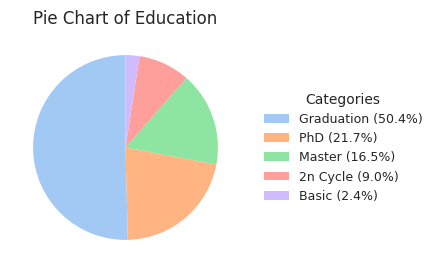

In [30]:
pie_chart('Education')

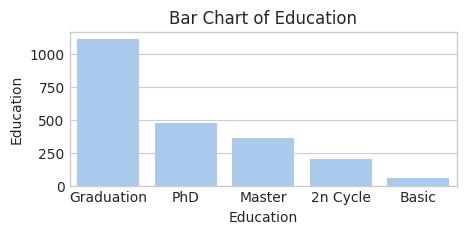

In [31]:
frequency('Education')

In [32]:
# Tạo hàm đếm frequency cho biến boolean
def boolean_frequency(col, figsize=(5,2)):
    data = df[col].copy()
    data = data.replace({1: 'Yes', 0: 'No'})
                        
    vc = data.value_counts()
    plt.figure(figsize=figsize)
    sns.barplot(x=vc.index, y=vc.values)
    plt.title(f'Bar Chart of {col}')
    plt.xlabel(col)
    plt.show()

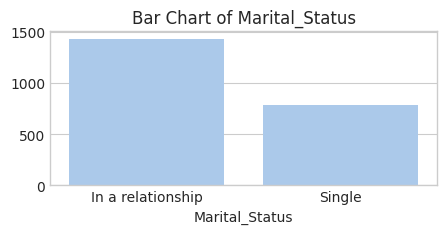

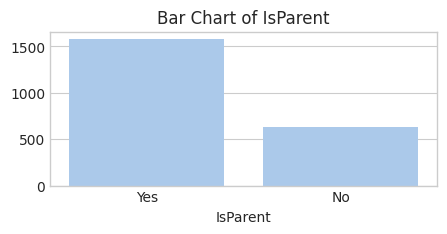

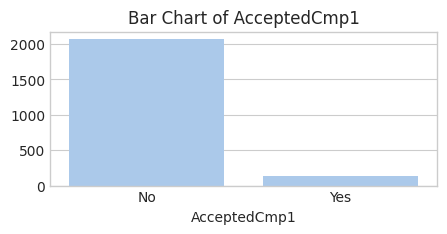

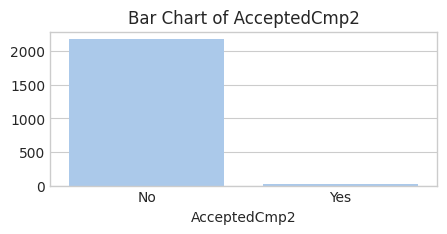

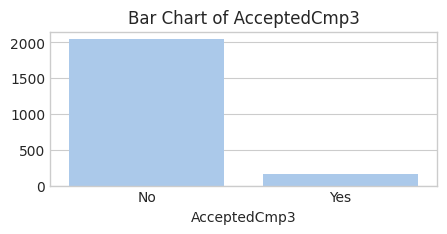

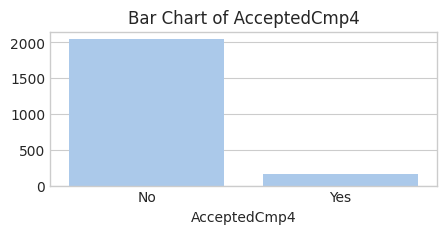

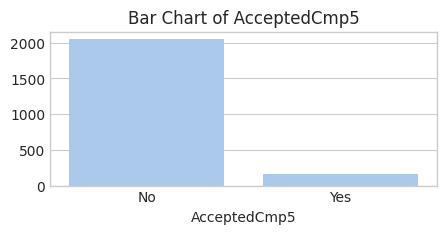

In [33]:
boolean_var = ['Marital_Status', 'IsParent', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
for var in boolean_var:
    boolean_frequency(var)

In [34]:
# Tạo hàm vẽ boxplot 
def box_plot(col, figsize=(5,3)):
    plt.figure(figsize=figsize)
    sns.boxplot(x=df[col], color='skyblue', width=0.5)
    plt.title(f'Box Plot of {col}', fontsize=12)
    plt.xlabel(col)
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.show()

In [38]:
numeric_col = ['Recency', 'Income', 'MntTotal', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

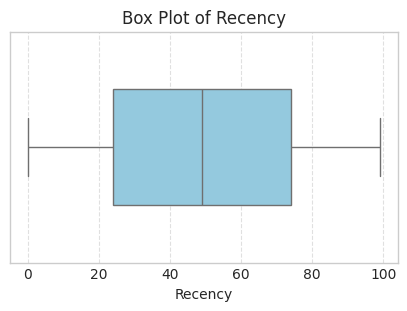

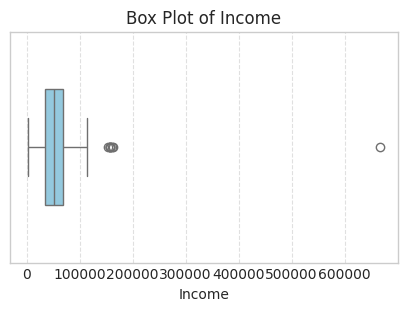

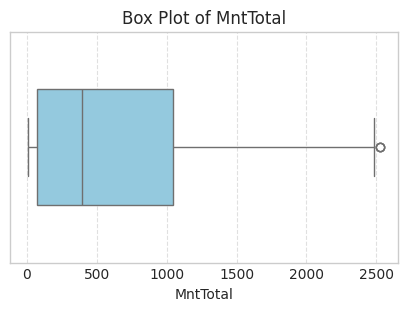

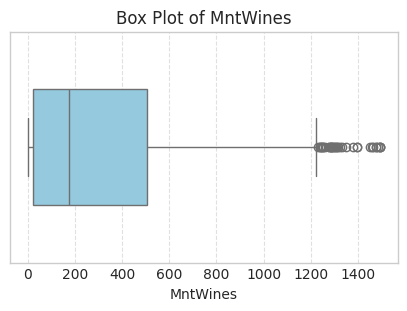

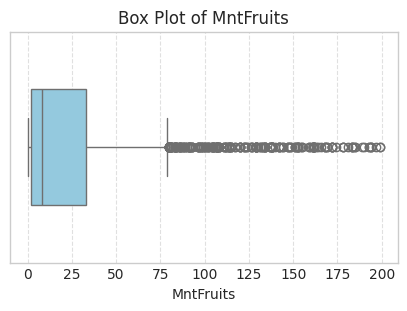

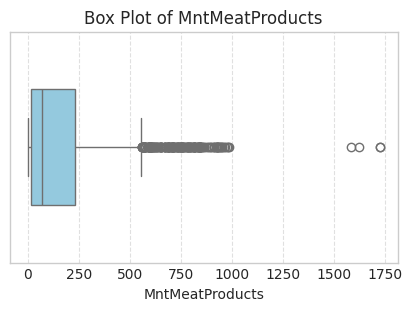

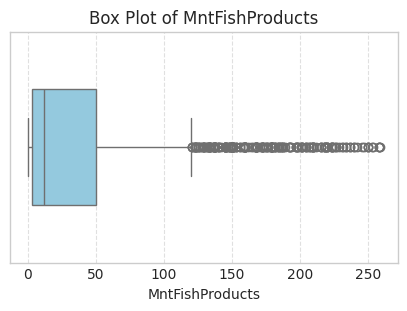

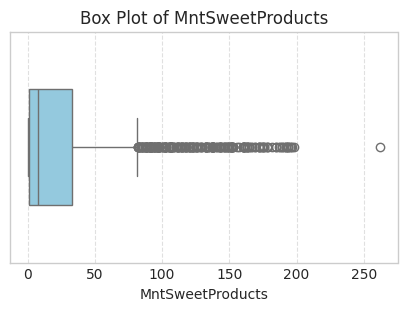

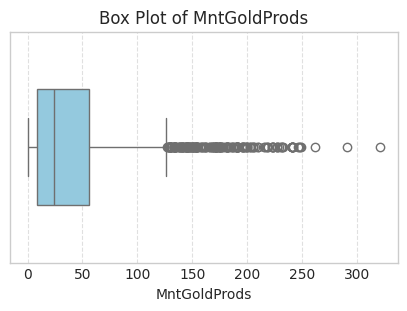

In [40]:
for col in numeric_col:
    box_plot(col)

In [53]:
def outlier_detect(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f'Outliers in {col}: {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)')


In [54]:
for col in numeric_col:
    outliner_detect(col)

NameError: name 'ountliners' is not defined